<a href="https://colab.research.google.com/github/nachospimp/pf/blob/main/Copia_de_PricingOpciones_Black_Scholes_M_C_Greeks_IV_JA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @ Nachospimp
#! pip install py_vollib
import math
from scipy.stats import norm
import random
import numpy as np
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho
import matplotlib.pyplot as plt

#**Pricing de Opciones, calculo de IV**

# Definir variables Black-Scholes, Monte-Carlo

Establecer parámetros en las métricas generales indicadas, con una volatilidad inicial aproximada para obtener el precio B-S de la opción call/put , precio, simulaciones e intervalo de confianza Monte-Carlo.

Con estos resultados, especificar las métricas necesarias en la seccion "IV" para obtener la Implied Volatility por medio de Delta o Vega, segun lo deseado.

Volver a calcular métricas generales con la volatilidad deseada ("vol"), ya sea la obtenida con Delta o Vega o bien mantener la aproximación de volatilidad original.

(En caso de error al definir nuevas métricas y correr esa específica selección, ejecutar el código completo..
Entorno de ejecución --> Ejecutar todo)


# **Métricas Generales**

In [ ]:
# **Métricas generales**
# Definir variables para Black-Scholes y Monte-Carlo.
# Inputs Interactivos.

S = 174.20 # Underlying Price

K = 175 # Strike Price

t = 0  # ej. meses 1/12, 3/12, 6/12, 9/12 \ días 180/365, 30/365, 1/365

T = 3/365 # Time to exp ej. meses: 1/12, 3/12, 6/12, 9/12 \ días 180/365, 30/365, 1/365

r = 0.0423 # Interest rate

vol = 0.31 # Volatilidad. Definir con aprox. inicial o definir (IV) por medio de delta o vega y re-calcular con la volatilidad actualizada, según se desee.

monte_carlo_size = 10**6 # Numero de simulaciones Monte Carlo

type = "c" # <- Para obtener griegas c/p según call o put


# **Código.** ^Correr con los inputs deseados^

In [ ]:
# Calcular D1 y D2
d1 = 1 / (vol * np.sqrt(T - t)) * (np.log(S / K) + (r + 0.5 * (vol**2)) * (T - t))  # (math.log(S/K) + (r + 0.5 * vol**2) * T ) / (vol * math.sqrt(T))
d2 = d1 - (vol * math.sqrt(T - t))

# Calcular Call Option Price
C = S * norm.cdf(d1) - K * math.exp(-r * (T - t)) *norm.cdf(d2)
# Calcular Put Option Price
P = K * math.exp(-r * (T - t)) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Monte-Carlo parámetros
N = np.random.standard_normal(10**6)
price_underlying = S * np.exp((r - 0.5 * (vol**2)) * T + vol * np.sqrt(T) * N)
monte_carlo_simulations = np.exp(-(r * T)) * np.array([max(S - K, 0.0) for S in price_underlying])
monte_carlo_price = np.mean(monte_carlo_simulations)
monte_carlo_confidence_interval = monte_carlo_price + np.array([-1, +1]) * 1.96 * np.std(monte_carlo_simulations) / np.sqrt(monte_carlo_size)

# Calcular option greeks
delta_option = delta(type, S, K, T, r, vol)
gamma_option = gamma(type, S, K, T, r, vol)
vega_option = vega(type, S, K, T, r, vol)
theta_option = theta(type, S, K, T, r, vol)
rho_option = rho(type, S, K, T, r, vol)

#**Resultados:**

In [ ]:
print('D1 =', round(d1,4))
print('D2 =', round(d2,3))
print('El valor B-S de la opción call es $', round (C, 2))
print('El valor B-S de la opción put es $', round (P, 2))
print('El valor de la opción Monte-Carlo en esta simulación es $', round (monte_carlo_price,2))
print('El intervalo de confianza Monte-Carlo es entre', (monte_carlo_confidence_interval))
print('El número de simulaciones Monte-Carlo es ', (monte_carlo_size))
print("OPTION GREEKS:")
print("Delta:", round(delta_option, 3))
print("Gamma:", round(gamma_option, 3))
print(" Vega:", round(vega_option, 3))
print("Theta:", round(theta_option, 3))
print("  Rho:", round(rho_option, 3))

D1 = -0.1366
D2 = -0.165
El valor B-S de la opción call es $ 1.61
El valor B-S de la opción put es $ 2.35
El valor de la opción Monte-Carlo en esta simulación es $ 1.61
El intervalo de confianza Monte-Carlo es entre [1.60654978 1.61696508]
El número de simulaciones Monte-Carlo es  1000000
OPTION GREEKS:
Delta: 0.446
Gamma: 0.081
 Vega: 0.062
Theta: -0.331
  Rho: 0.006


#**Implied Volatility (IV)**

#**Obtener IV  para opción por medio de Delta. Definir métricas.**

In [ ]:
# Parámetros para calcular IV por medio de Delta.
# Para obtener la volatilidad por este método es necesario la Delta previamente obtenida en los resultados.
# Inputs Interactivos.

S = 174.20   # Spot Price

K = 175     # Strike price

t = 3/365  # Tiempo para expiración

r = 0.0423    # Interest Rate

delta = 0.446 # <-- Delta obtenida anteriormente en OPTION GREEKS. No olvidar definir si es call o put en 'type=" "'


# Código. Método de Newton (Delta).




In [ ]:
# Código para obtener IV por medio de Delta. Método de Newton.
def newtons_method(f, fprime, R = 0, max_iter = 1000, tol=1e-3, args = [], debug = False):
    count = 0
    epsilon = 1
    f_return = []
    fprime_return = []

    while epsilon >= tol:
        count += 1
        if count >= max_iter:
            print('Exiting on runaway loop.')
            return (R, count)

        old_R = R

        function_value = f(R, args = args)
        function_derivative = fprime(R, args = args)
        #ind = np.where(function_derivative <= 0)
        #ind = ind[0]

        R = -function_value / function_derivative + R

        #if ind.size > 0:
        #    R[ ind ] = R[ ind ] * 0.5 + R[ ind ]

        if np.isscalar(R):
            epsilon = np.abs( (R - old_R) /old_R )
        else:
            epsilon = np.linalg.norm( R - old_R, np.Inf)

        if debug == True:
            f_return.append(function_value)
            fprime_return.append(function_derivative)

    return R, count

def delta_call(sigma, S, K, r, t):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )

    return norm.cdf(d1)

def vanna(sigma, args):
    S = args[0]
    K = args[1]
    r = args[2]
    t = args[3]

    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)

    return -norm.cdf(d1) * d2 / sigma

def objective(sigma, args):
    S = args[0]
    K = args[1]
    r = args[2]
    t = args[3]
    delta = args[4]

    return delta_call(sigma, S, K, r, t) - delta

args = (S, K, r, t, delta)
sigma = np.linspace(0, 1)
y = objective(sigma, args)

<ipython-input-53-c2a11e7e70bb>:38: RuntimeWarning: divide by zero encountered in divide
  d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),


# **Resultados de IV desde Delta.**

In [ ]:
print('La IV calculada por medio de Delta es =', (newtons_method(objective, vanna, R = 0.10, args = args)))
print('Re-calcular en métricas generales con esta "vol" actualizada, si se desea.' )


La IV calculada por medio de Delta es = (0.31155271975698, 6)
Re-calcular en métricas generales con esta "vol" actualizada, si se desea.


# Gráfica IV. (Delta)

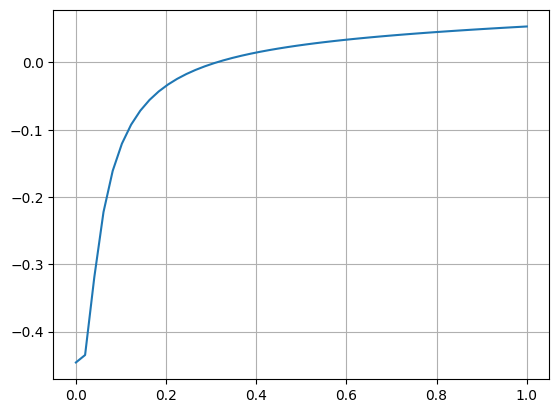

In [ ]:
plt.plot(sigma, y)
plt.grid()

#**Obtener IV  para Call Option por medio de Vega. Definir métricas.**

In [ ]:
# Parámetros para obtener IV por medio de Vega.
# Para obtener la volatilidad por este método es necesario una aproximación de volatilidad inicial y el precio de mercado de la opción.

vol_old = 0.3115 # <-- Aproximacion de volatilidad inicial

S0 = 174.20 # Spot Price

Strike_Price = 175 # Strike Price

time = 3/365  # Tiempo para expiración

interest = 0.0423 # Risk-free rate

market_price = 1.61 # <-- Precio de mercado de la opción


# Código. Método de Newton (Vega).

In [ ]:
import matplotlib.pyplot as plt

 #Código para obtener IV por medio de Vega. Método de Newton. Requiere una volatilidad inicial y el precio de mercado de la opción.
def d(sigma, S0, Strike_Price, time, interest):
  D1 = 1 / (sigma * np.sqrt(time)) * (np.log(S0/Strike_Price) + (interest + 0.5 * (sigma**2)) * t)
  D2 = D1 - (sigma * math.sqrt(time))
  return D1, D2

def call(sigma, S0, Strike_Price, time, interest, D1, D2):
  Call = S0 * norm.cdf(D1) - Strike_Price * math.exp(-interest * (time)) * norm.cdf(D2)
  return Call

  " Calculate implied volatility"
  ""

max_iter = 1000 # max numero de iteraciones

count = 0
tol = 0.00001
epsilon = 1

while epsilon > tol:
  count += 1
  if count >= max_iter:
    print('Breaking on count')
    break;

  orig_vol = vol_old # Aproximación poriginal de volatilidad

  D1, D2 = d(vol_old, S0, Strike_Price, time, interest)
  function_value = call(vol_old, S0, Strike_Price, time, interest, D1, D2) - market_price

  vega = S0 * norm.pdf(D1, 0, 1) * np.sqrt(time)
  #vega = vega_option
  vol_new = -function_value / vega + vol_old # Nueva vol. por medio de Vega.

  epsilon = abs((vol_old - orig_vol) / orig_vol)

sigma = np.linspace (0,1)
D1,D2 = d(sigma, S0, Strike_Price, time, interest)
call_price = call(sigma,S0, Strike_Price, time, interest, D1, D2)

<ipython-input-57-e06bb483bd46>:5: RuntimeWarning: divide by zero encountered in divide
  D1 = 1 / (sigma * np.sqrt(time)) * (np.log(S0/Strike_Price) + (interest + 0.5 * (sigma**2)) * t)


# **Resultados de IV desde Vega.**

In [ ]:
print('Nuestra aproximación de volatilidad inicial era       =', (vol_old))
print('La volatilidad (IV) calculada por medio de Vega es de =', round(vol_new, 4))
print('Re-calcular en métricas generales con esta "vol" actualizada, si se desea.' )

Nuestra aproximación de volatilidad inicial era       = 0.3115
La volatilidad (IV) calculada por medio de Vega es de = 0.31
Re-calcular en métricas generales con esta "vol" actualizada, si se desea.


# Gráfica IV. (Vega)

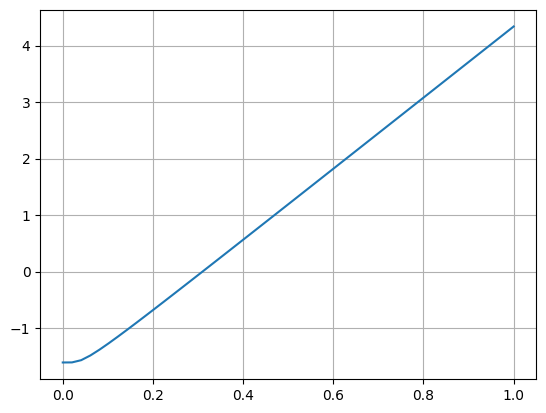

In [ ]:
plt.plot( sigma , call_price - market_price)
plt.grid()
plt.show()

# **Resultados generales:**

# Black-Scholes Price

In [ ]:
print('El valor de la opción call es $', round (C, 2))
print('El valor de la opción put es $', round (P, 2))

El valor de la opción call es $ 1.61
El valor de la opción put es $ 2.35


# Monte Carlo Price

In [ ]:
print('El valor de la opción Monte-Carlo en esta simulación es $', round (monte_carlo_price,2))

El valor de la opción Monte-Carlo en esta simulación es $ 1.61


# Intervalo de Confianza Monte-Carlo

In [ ]:
print('El intervalo de confianza Monte-Carlo es entre', (monte_carlo_confidence_interval))

El intervalo de confianza Monte-Carlo es entre [1.60654978 1.61696508]


# Número de simulaciones

In [ ]:
print('El número de simulaciones Monte-Carlo es ', (monte_carlo_size))

El número de simulaciones Monte-Carlo es  1000000


# IV. Implied Volatility

In [ ]:
print('Volatilidad actualmente en métricas generales         =', (vol))
print('Nuestra aproximación de volatilidad inicial era       =', (vol_old))
print('La IV calculada por medio de Delta es                 =', (newtons_method(objective, vanna, R = 0.10, args = args)))
print('La volatilidad (IV) calculada por medio de Vega es de =', round(vol_new, 4))

Volatilidad actualmente en métricas generales         = 0.31
Nuestra aproximación de volatilidad inicial era       = 0.3115
La IV calculada por medio de Delta es                 = (0.31155271975698, 6)
La volatilidad (IV) calculada por medio de Vega es de = 0.31


#**Respuestas para BTC-USD**

In [ ]:
print('D1 =', round(d1,4))
print('D2 =', round(d2,3))
print('El valor de la opción call es $', round (C, 2))
print('El valor de la opción put es $', round (P, 2))
print('El valor de la opción Monte-Carlo en esta simulación es $', round (monte_carlo_price,2))
print('El intervalo de confianza Monte-Carlo es entre', (monte_carlo_confidence_interval))
print('El número de simulaciones Monte-Carlo es ', (monte_carlo_size))
print('En esta simulación ambos se encuentran dentro del intervalo de confianza de Monte-Carlo.')

D1 = -0.1366
D2 = -0.165
El valor de la opción call es $ 1.61
El valor de la opción put es $ 2.35
El valor de la opción Monte-Carlo en esta simulación es $ 1.61
El intervalo de confianza Monte-Carlo es entre [1.60654978 1.61696508]
El número de simulaciones Monte-Carlo es  1000000
En esta simulación ambos se encuentran dentro del intervalo de confianza de Monte-Carlo.
